https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib notebook

### Linear Regression Problem


In [2]:
n = 100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.6237,  1.0000],
        [-0.7288,  1.0000],
        [-0.8877,  1.0000],
        [ 0.7417,  1.0000],
        [-0.1721,  1.0000]])

In [4]:
w_y = torch.tensor([3.,2]);w_y

tensor([3., 2.])

In [5]:
y=x@w_y+torch.rand(n)


<IPython.core.display.Javascript object>


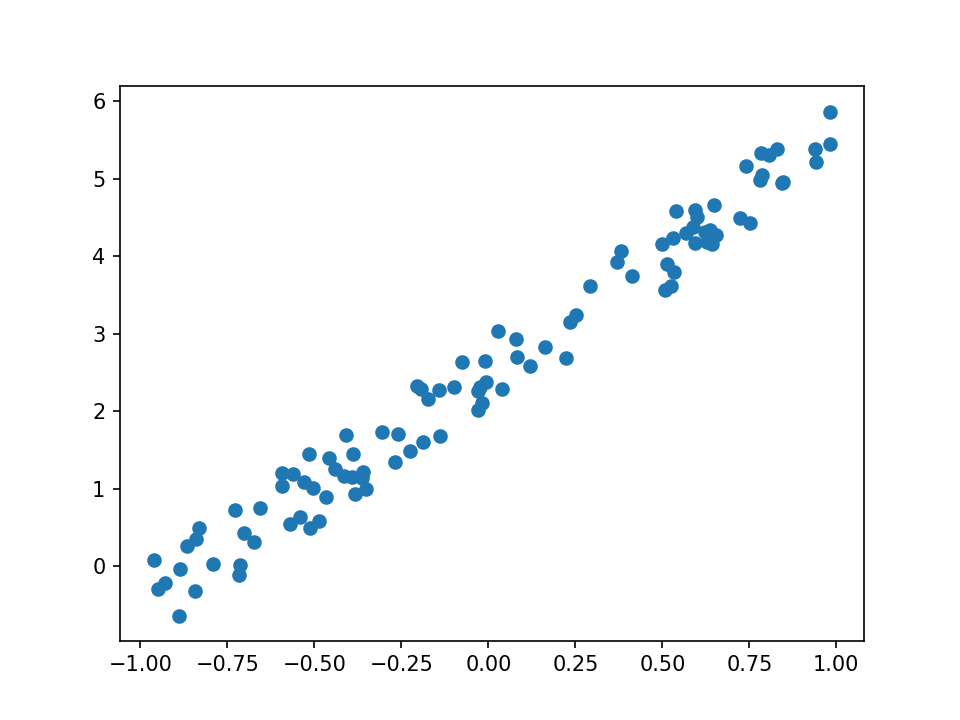

In [6]:
plt.scatter(x[:,0],y)
plt.show()

In [7]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

### Plot loss function

In [8]:
from mpl_toolkits import mplot3d
import numpy as np

In [10]:
def loss_wrt_wgts(w1,w2):
    w = torch.Tensor([w1, w2])
    y_hat = x@w
    return mse(y_hat, y)
loss_wgts = np.vectorize(loss_wrt_wgts)

In [12]:
w0_range = np.linspace(-20,20,50)
w1_range = np.linspace(-20,20,50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

<IPython.core.display.Javascript object>


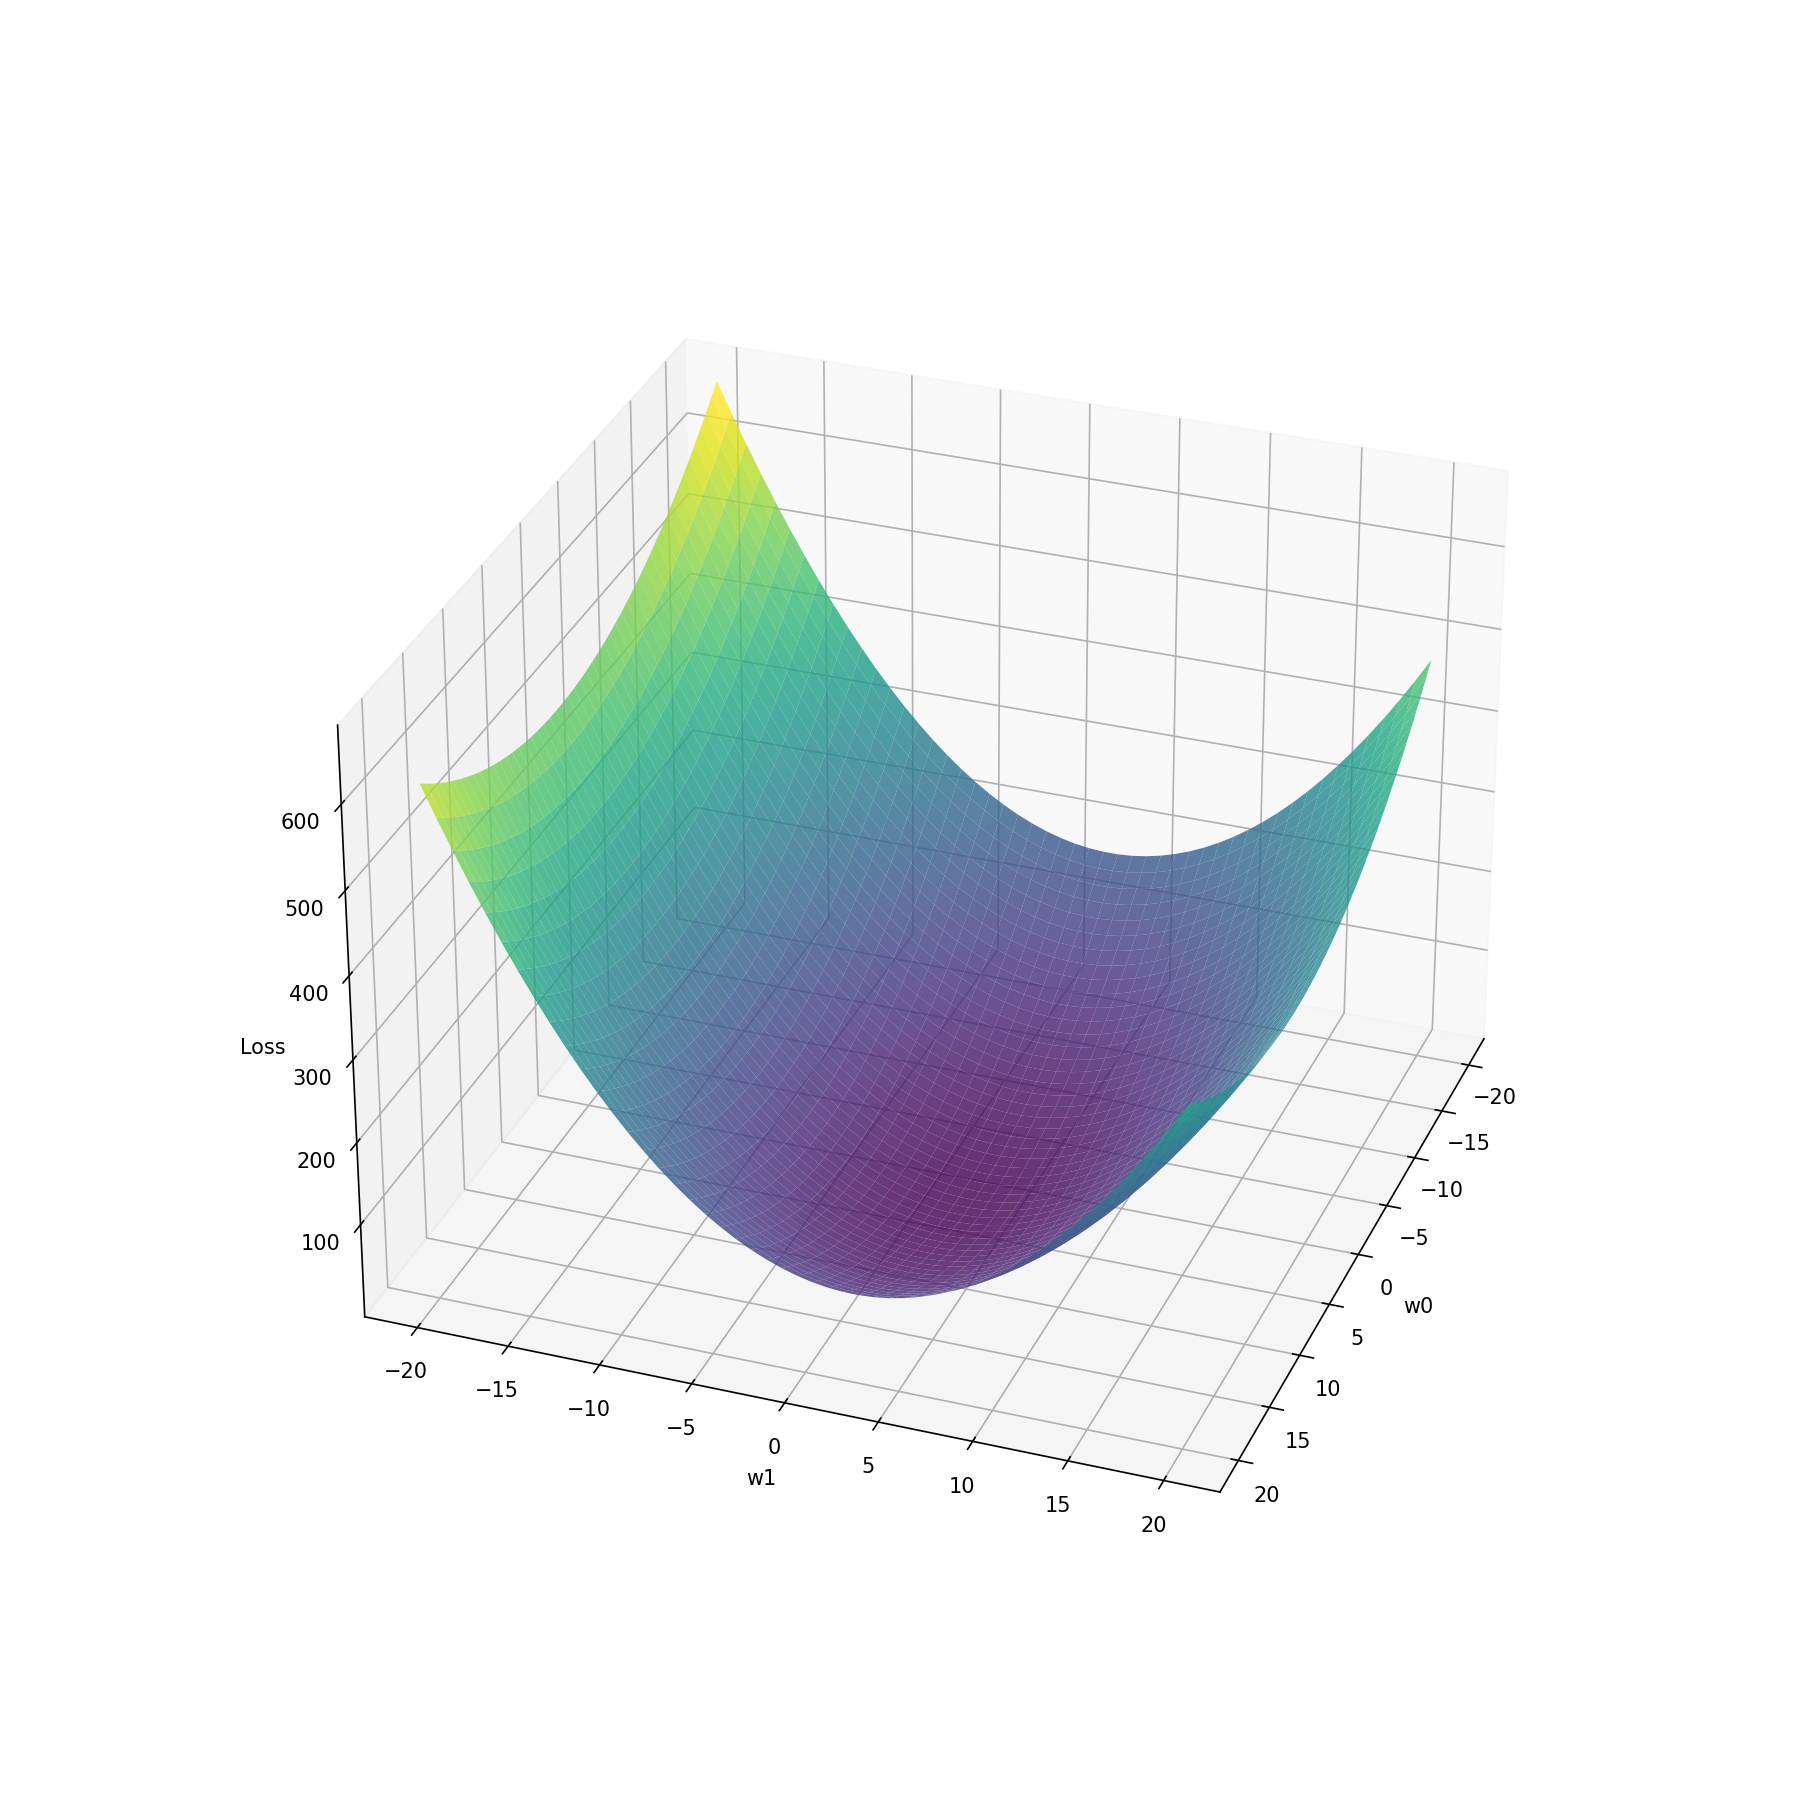

In [13]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
ax.plot_surface(*mesh, loss_mesh, cmap = 'viridis',alpha = 0.8)
ax.set_xlabel('w0'); ax.set_ylabel('w1');ax.set_zlabel('Loss')
ax.view_init(30,20)


### Gradient Descent

In [24]:
def update(w):
    y_hat = x@w
    loss = mesh(y_hat, y)
    prev_wgts = w.data.clone()
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    return prev_wgts,loss.item()

In [25]:
def train(w0):
    recorder = []
    w = torch.tensor(w0, requires_grad=True)
    for t in range(n_epoches): recorder.append(update(w))
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = torch.stack(rec_wgts)
    return rec_wgts, rec_loss

In [26]:
# hyper parameters
lr = 0.1
n_epoches = 100

#initial parameters (weights)
w0 = [-18., -18.]
rec_wgts, rec_loss = train(w0)

TypeError: 'list' object is not callable

In [19]:
w0_range = np.linspace(-20,20,50)
w1_range = np.linspace(-20,20,50)
mesh = np.meshgrid(w0_range, w1_range)
mesh 

[array([[-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ],
        [-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ],
        [-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ],
        ...,
        [-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ],
        [-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ],
        [-20.        , -19.18367347, -18.36734694, ...,  18.36734694,
          19.18367347,  20.        ]]),
 array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.18367347, -19.18367347, -19.18367347, ..., -19.18367347,
         -19.18367347, -19.18367347],
        [-18.36734694, -18.36734694, -18.36734694, ..., -18.36734694,
         -18.36734694, -18.36734694],
        ...,
